<a href="https://colab.research.google.com/github/AleksanderSokolov/algorithm/blob/master/part1/L02/DZ02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).
 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?
 3*. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]])

In [0]:
y = [45, 55, 50, 59, 65,
    35, 75, 80, 50, 60]

In [5]:
# Нормализация [0, 1]
X[1].min(), X[1].max()

(0, 10)

In [7]:
# Нормализация [0, 1]
X[1].min(), X[1].max()

(0, 10)

In [8]:
X[2].min(), X[2].max()

(450, 2000)

In [9]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [10]:
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e-01, 1.00e-01, 2.00e-01, 1.00e-01, 3.00e-01, 0.00e+00,
        5.00e-01, 1.00e+00, 1.00e-01, 2.00e-01],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [11]:
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.1       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [1.        , 1.        , 2.        , 1.        , 2.        ,
        1.        , 3.        , 3.        , 1.        , 2.        ]])

In [0]:
# Стандартизация

(array([1., 4., 2., 1., 0., 1., 0., 0., 0., 1.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

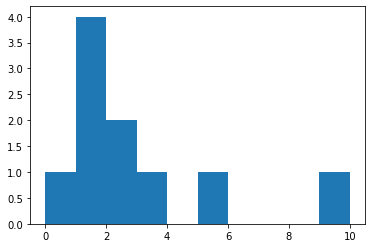

In [13]:
plt.hist(X[1])

(array([3., 2., 1., 1., 0., 0., 2., 0., 0., 1.]),
 array([ 450.,  605.,  760.,  915., 1070., 1225., 1380., 1535., 1690.,
        1845., 2000.]),
 <a list of 10 Patch objects>)

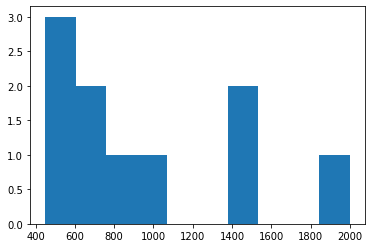

In [14]:
plt.hist(X[2])

In [15]:
X1_mean = X[1].mean()
X1_mean

2.6

In [16]:
X1_std = X[1].std()
X1_std

2.8000000000000003

In [0]:
X_st = X.copy().astype(np.float64)

In [18]:
X_st[1] = (X[1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [-5.71428571e-01, -5.71428571e-01, -2.14285714e-01,
        -5.71428571e-01,  1.42857143e-01, -9.28571429e-01,
         8.57142857e-01,  2.64285714e+00, -5.71428571e-01,
        -2.14285714e-01],
       [ 5.00000000e+02,  7.00000000e+02,  7.50000000e+02,
         6.00000000e+02,  1.45000000e+03,  8.00000000e+02,
         1.50000000e+03,  2.00000000e+03,  4.50000000e+02,
         1.00000000e+03],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  1.00000000e+00,
         2.00000000e+00]])

(array([1., 4., 2., 1., 1., 0., 0., 0., 0., 1.]),
 array([-0.92857143, -0.57142857, -0.21428571,  0.14285714,  0.5       ,
         0.85714286,  1.21428571,  1.57142857,  1.92857143,  2.28571429,
         2.64285714]),
 <a list of 10 Patch objects>)

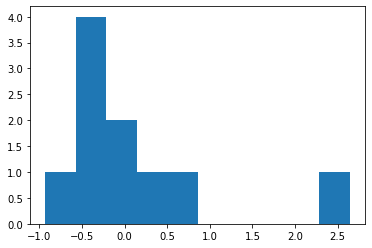

In [19]:
plt.hist(X_st[1])

In [0]:
def calc_std_feat(x):
  res = (x - x.mean()) / x.std()
  return res

In [0]:
X_st[2] = calc_std_feat(X[2])

In [22]:
X_st[3] = calc_std_feat(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [23]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [0]:
# SGD

In [0]:
def calc_mse(y, y_pred):
  err = np.mean((y - y_pred)**2)
  return err

In [0]:
def eval_model(X, y, iterations, alpha=1e-4):
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
    if i % (iterations / 10) == 0:
      print(i, W, err)
  return W

In [27]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

100 [49.9755057   4.70766658  3.33297191  3.5595032 ] 97.71689912317127
200 [56.41536686  4.96875159  3.03324615  3.64425854] 41.163015867997196
300 [57.26941839  5.17116865  2.77054135  3.7080442 ] 40.05660193504417
400 [57.38268232  5.33717973  2.55065257  3.76474569] 39.95959492452975
500 [57.39770334  5.47356283  2.36667333  3.81471486] 39.90403906356213
600 [57.39969542  5.5857583   2.21276854  3.8584174 ] 39.86563908133368
700 [57.39995961  5.67817273  2.08404393  3.89640081] 39.8389400594238
800 [57.39999464  5.75438313  1.97639627  3.92924192] 39.82036431518154
900 [57.39999929  5.81729908  1.88638689  3.95751264] 39.807434697912825
1000 [57.39999991  5.86929189  1.81113507  3.98175852] 39.798431885685766


array([57.39999991,  5.86929189,  1.81113507,  3.98175852])

In [0]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  n_batch = n // qty_in_batch
  if n % qty_in_batch != 0:
    n_batch += 1
  for i in range(1, iterations+1):
    for b in range(n_batch):
      start_ = qty_in_batch*b
      end_ = qty_in_batch*(b+1)
      
      # print(b, n_batch, start_, end_)
      
      X_tmp = X[:, start_ : end_]
      y_tmp = y[start_ : end_]
      y_pred_tmp = np.dot(W, X_tmp)
      err = calc_mse(y_tmp, y_pred_tmp)
      W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
    if i % (iterations / 10) == 0:
      print(i, W, err)
  return W

In [30]:
eval_sgd_model(X_st, y, iterations=5000, qty_in_batch=5, alpha=1e-2)

500 [57.39584135  5.76905383  1.8175198   4.1004993 ] 39.0907448278809
1000 [57.39794453  6.01109545  1.58462747  4.09296494] 38.67374096052377
1500 [57.39784842  6.09451387  1.48791035  4.1070851 ] 38.45516856335335
2000 [57.39781238  6.12476319  1.44812756  4.1169898 ] 38.35443480602885
2500 [57.39779849  6.13616174  1.4318549   4.12202375] 38.31054907950873
3000 [57.39779303  6.14057379  1.42522065  4.12431304] 38.2919999954358
3500 [57.39779086  6.14231216  1.4225212   4.12530189] 38.284291942383746
4000 [57.39778999  6.14300488  1.42142408  4.12571768] 38.28112007429347
4500 [57.39778964  6.14328288  1.42097849  4.12588993] 38.279822313408786
5000 [57.39778949  6.14339492  1.4207976   4.12596068] 38.27929313647452


array([57.39778949,  6.14339492,  1.4207976 ,  4.12596068])

In [0]:
# L1 регуляризация

In [0]:
#f(x, W) + (lambda_/2) * np.sum(np.abs(W))

In [0]:
# L2 регуляризация

In [0]:
#f(x, W) + (lambda_/2) * np.sum(W**2)
#df/dw1 = d(w1**2 + w2**2 + w3**2) / dw1 = 2*w1 + 0 + 0 = 2*w1
#f'(x, W) + lambda_ * np.sum(W)


In [0]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
    if i % (iterations / 10) == 0:
      print(i, W, err)
  return W

In [36]:
eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

500 [57.39479705  5.10767868  2.46037345  4.08674902] 39.98166412253417
1000 [57.39713005  5.765859    1.85689028  4.03893236] 39.807231204063974
1500 [57.39713014  5.99060723  1.60529698  4.06885866] 39.78240504280037
2000 [57.39713014  6.07152025  1.50155606  4.09300748] 39.7785235657889
2500 [57.39713014  6.10185559  1.45905205  4.10572941] 39.77788748617128
3000 [57.39713014  6.11355928  1.44170275  4.11160375] 39.77777930470261
3500 [57.39713014  6.11816175  1.43463681  4.11416107] 39.77775983405893
4000 [57.39713014  6.11999396  1.43176283  4.1152412 ] 39.777755943216036
4500 [57.39713014  6.12072893  1.43059479  4.11568989] 39.77775502451415
5000 [57.39713014  6.12102515  1.4301203   4.11587451] 39.777754760507676


array([57.39713014,  6.12102515,  1.4301203 ,  4.11587451])

In [0]:
#C = 1/lambda_